By 'testing distributions' we mean statistical tests that evaluate whether observed data follow a particular distribution.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import normaltest

### Helper function to check the p-level against aplha level and print the result

In [22]:
def check_p_val(p_val, alpha: float = 0.05):
    if p_val < alpha:
        print('We have evidence to reject the null hypotesis.')
    else:
        print('We do not have evidence to reject the null hypotesis.')

In [7]:
d1 = stats.norm.rvs(size=100000)

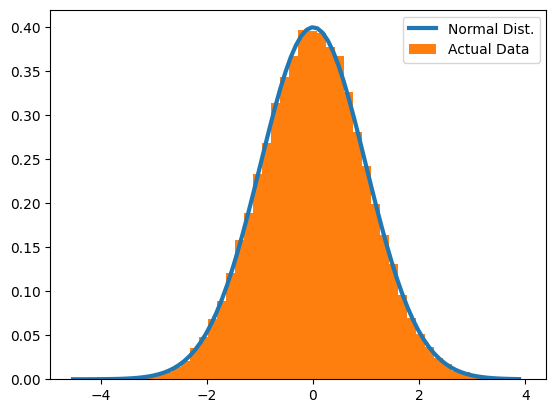

In [13]:
xs = np.arange(d1.min(), d1.max(), 0.1)
fit = stats.norm.pdf(xs,np.mean(d1), np.std(d1))

plt.plot(xs, fit, label = 'Normal Dist.', lw = 3)
plt.hist(d1, 50, density=True, label= 'Actual Data')
plt.legend()

- orange is the observed data
- blue is the expected "form"

We need to check it statistically

In [14]:
normaltest?

Signature: normaltest(a, axis=0, nan_policy='propagate', *, keepdims=False)
Docstring:
Test whether a sample differs from a normal distribution.

This function tests the null hypothesis that a sample comes
from a normal distribution.  It is based on D'Agostino and
Pearson's [1]_, [2]_ test that combines skew and kurtosis to
produce an omnibus test of normality.

Parameters
----------
a : array_like
    The array containing the sample to be tested.
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
nan_policy : {'propagate', 'omit', 'raise'}
    Defines how to handle input NaNs.
    
    - ``propagate``: if a NaN is present in the axis slice (e.g. row) along
      which the  statistic is computed, the corresponding entry of the output
      w

In [15]:
stat, p_val = normaltest(d1)

In [25]:
print('Normaltest p-value is: {:1.2f}'.format(p_val))

check_p_val(p_val, alpha = 0.05)

Normaltest p-value is: 0.39
We do not have evidence to reject the null hypotesis.


### Test non-normal distribution

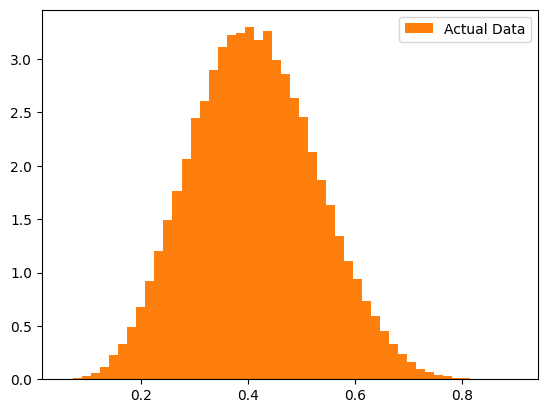

In [27]:
d2 = stats.beta.rvs(7,10,size=100000)

plt.hist(d2,50, density=True, color='C1', label='Actual Data')
plt.legend()

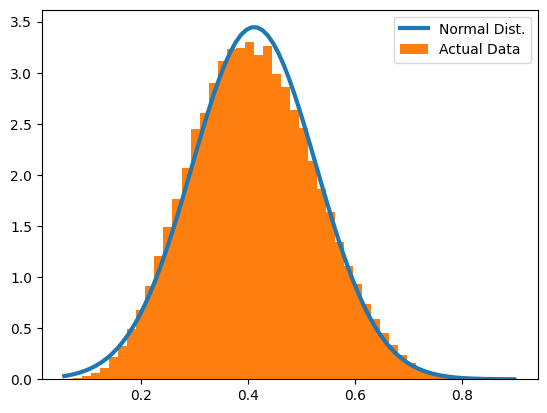

In [30]:
xs = np.arange(d2.min(), d2.max(), 0.01)
fit = stats.norm.pdf(xs, np.mean(d2), np.std(d2))

plt.plot(xs, fit, label = 'Normal Dist.', lw=3)
plt.hist(d2, 50, density=50, label = 'Actual Data')
plt.legend()

In [31]:
stat, p_val = normaltest(d2)

In [35]:
print('Normal p-value is{:1.2e}'.format(p_val))

check_p_val(p_val)

Normal p-value is2.79e-181
We have evidence to reject the null hypotesis.


### You can use the Kolmogorov-Smirnov test to check if a set of data has some other distribution

In [36]:
from scipy.stats import kstest

In [37]:
kstest?

Signature:
kstest(
    rvs,
    cdf,
    args=(),
    N=20,
    alternative='two-sided',
    method='auto',
    *,
    axis=0,
    nan_policy='propagate',
    keepdims=False,
)
Docstring:
Performs the (one-sample or two-sample) Kolmogorov-Smirnov test for
goodness of fit.

The one-sample test compares the underlying distribution F(x) of a sample
against a given distribution G(x). The two-sample test compares the
underlying distributions of two independent samples. Both tests are valid
only for continuous distributions.

Parameters
----------
rvs : str, array_like, or callable
    If an array, it should be a 1-D array of observations of random
    variables.
    If a callable, it should be a function to generate random variables;
    it is required to have a keyword argument `size`.
    If a string, it should be the name of a distribution in `scipy.stats`,
    which will be used to generate random variables.
cdf : str, array_like or callable
    If array_like, it should be a 1-D array o

### Compare the data to the normal distribution.

In [38]:
stat, p_val = kstest(d2, 'norm')
print('Statistic: {:1.2f} \nP-Value: {:1.2e}'.format(stat, p_val))
check_p_val(p_val, alpha=0.05)

Statistic: 0.56 
P-Value: 0.00e+00
We have evidence to reject the null hypotesis.


### Compare the data to beta distribution.

In [39]:
stat, p_val = kstest(d2, 'beta', [7, 10])
print('Statistic: \t{:1.2f} \nP-Value: \t{:1.2e}\n'.format(stat, p_val))
check_p_val(p_val, alpha=0.05)

Statistic: 	0.00 
P-Value: 	6.23e-01

We do not have evidence to reject the null hypotesis.
